In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_dev_set = pd.read_csv("genentech-404-challenge/dev_set.csv").set_index(["RID_HASH", "VISCODE"])
df_dev_1 = pd.read_csv("genentech-404-challenge/dev_1.csv").set_index(["RID_HASH", "VISCODE"])
df_dev_2 = pd.read_csv("genentech-404-challenge/dev_2.csv").set_index(["RID_HASH", "VISCODE"])
df_dev_3 = pd.read_csv("genentech-404-challenge/dev_3.csv").set_index(["RID_HASH", "VISCODE"])
df_test_a = pd.read_csv("genentech-404-challenge/test_A.csv").set_index(["RID_HASH", "VISCODE"])
df_test_b = pd.read_csv("genentech-404-challenge/test_B.csv").set_index(["RID_HASH", "VISCODE"])
df_dev_set.shape, df_dev_1.shape, df_dev_2.shape, df_dev_3.shape, df_test_a.shape, df_test_b.shape

((4101, 14), (4101, 14), (4101, 14), (4101, 14), (1328, 14), (1470, 14))

In [86]:
assert all(df_dev_set.index == df_dev_1.index)
assert all(df_dev_set.index == df_dev_2.index)
assert all(df_dev_set.index == df_dev_3.index)


In [70]:
df_dev_1.isnull().sum(axis=1).value_counts()

6     886
4     760
8     629
2     515
0     387
10    303
12    211
7     118
5      85
3      59
1      52
9      48
11     26
13     20
14      2
dtype: int64

In [71]:
df_dev_2.isnull().sum(axis=1).value_counts()

6     740
4     601
8     560
2     482
0     320
10    235
7     229
5     194
12    182
3     149
9     146
1     119
11     79
13     63
14      2
dtype: int64

In [72]:
df_dev_3.isnull().sum(axis=1).value_counts()

6     864
4     727
2     633
8     614
0     410
10    349
12    199
5      65
3      59
7      58
9      41
1      40
11     23
13     19
dtype: int64

In [73]:
df_test_a.isnull().sum(axis=1).value_counts()

6     254
4     249
8     194
2     193
0     157
10    101
12     72
7      24
1      21
3      19
9      14
5      13
13      9
11      8
dtype: int64

In [74]:
df_test_b.isnull().sum(axis=1).value_counts()

6     287
4     223
2     208
8     176
0     107
10     74
5      70
12     65
7      63
9      56
3      54
1      36
11     32
13     17
14      2
dtype: int64

In [75]:
df_test_b[df_test_b.isnull().sum(axis=1) == 0]

,,AGE,PTGENDER_num,PTEDUCAT,DX_num,APOE4,CDRSB,MMSE,ADAS13,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp
RID_HASH,VISCODE,,,,,,,,,,,,,,
94e1d769d99be35317c90140b4d39aceb0cf650e5c33fe7b5ddb362e70e6205b,0,71.6,1.0,17.0,0.0,1.0,0.0,30.0,12.33,8826.0,7202.0,959779.0,4653.0,18800.0,19278.0
614dd22e9b99a28e67b9a9a90ea04103f8ec7376815de71345a8de06b6353641,0,72.6,0.0,16.0,1.0,0.0,0.5,29.0,14.00,62279.9,7616.9,1145420.0,4343.0,21880.0,24655.0
5c70b9b0cf1e1e840f03cb79fae2dea6dbd70888444e9c8d8b52796e62bd0cef,0,67.8,0.0,16.0,0.0,0.0,0.0,30.0,5.00,14898.0,9512.0,1201660.0,4331.0,20399.0,20726.0
ccd42d6bd725952dca51a6ecf44aeaff8e881dfbef34911a3dfe7452e8ed6d83,66,77.2,1.0,15.0,0.0,0.0,0.0,27.0,5.00,23549.6,7499.8,1012500.0,4500.0,18258.0,21314.0
09612642cdb4e6730c6c687b6cd261c3ad60da787e6475cd5e662e486f1b8eae,12,73.2,0.0,17.0,2.0,1.0,8.0,25.0,34.00,87989.1,4564.3,1129900.0,1992.0,15645.0,17084.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33e07fa818c6ec795c7943c92e4c011890688767a1d67b0567c375bd0f44e72a,66,82.8,0.0,18.0,2.0,0.0,4.0,24.0,23.67,66097.7,6711.1,1090420.0,4436.0,18126.0,21263.0
766addb719b840893e7dae5f6b260980626aca68fec16a96cdf4d7d6e6dfefb6,0,68.3,1.0,19.0,1.0,0.0,0.5,29.0,15.00,16989.0,7976.0,1035480.0,3637.0,17919.0,20241.0
e5a8c3858dfc108d7bd4ee17299934e49cce0918c5f37ef8af156b5799d39c76,102,68.5,1.0,12.0,2.0,0.0,0.0,28.0,22.00,24648.8,6480.6,789264.0,3967.0,13842.0,17360.0


In [78]:
df_test_b.shape, df_test_b[df_test_b.isnull()].shape

((1470, 14), (1470, 14))

In [80]:
df_test_b[~df_test_b.isnull()]

,,AGE,PTGENDER_num,PTEDUCAT,DX_num,APOE4,CDRSB,MMSE,ADAS13,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp
RID_HASH,VISCODE,,,,,,,,,,,,,,
90a4f1869cf459af5fe39e53f1c328540f1dcf5a1908f70171bb729183471a5b,60,67.9,1.0,20.0,0.0,1.0,0.0,30.0,9.00,16259.0,NaN,941640.0,NaN,NaN,NaN
fad8ca8f903cf3ddf566926eabdb8718e85689626755192ff91cd4f1e5d0a449,30,69.1,NaN,16.0,0.0,0.0,0.0,29.0,4.33,30476.9,8983.9,NaN,6141.0,23331.0,20063.0
d342fb7689e49c754709870c77e1aa3ed770dd193e9f9cbbb175d46602f811ef,12,NaN,NaN,12.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5319e7ba149f0f81715b5e7f854036fc937141840bbd52688a5fb05cbe55b158,6,NaN,NaN,18.0,NaN,0.0,NaN,NaN,NaN,NaN,6570.0,NaN,3480.0,19224.0,18506.0
6eef135d8c4eca67b0e130b8f4aedbc37a99938224d6612213a28619597bc66b,0,NaN,0.0,16.0,0.0,0.0,0.0,29.0,7.00,NaN,7714.0,1086350.0,4609.0,20909.0,19304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fbf6267bf7d92b507feb4957d7aa90ea5bb50893bb79d452cb796e1115e73b23,0,NaN,NaN,12.0,NaN,2.0,NaN,NaN,NaN,NaN,6709.0,NaN,3861.0,16284.0,19556.0
03e8ddc654f8e27332c5b09618b355d7f9529d614adb0faca1ffc21bd5f097ae,12,81.5,0.0,15.0,NaN,0.0,NaN,NaN,NaN,46025.0,NaN,842367.0,NaN,NaN,NaN
1156748dfd6e69e1f364c31584e957d3b1ef656b898942eb63dedd325130c8f6,0,NaN,0.0,18.0,0.0,0.0,0.0,29.0,10.00,NaN,NaN,1230920.0,NaN,NaN,NaN


In [3]:
# double check if all csv have the same columns
columns = [df.columns for df in [df_dev_set, df_dev_1, df_dev_2, df_dev_3, df_test_a, df_test_b]]
for columns_a in columns:
    for columns_b in columns[1:]:
        assert all(columns_a == columns_b)

<AxesSubplot:ylabel='Frequency'>

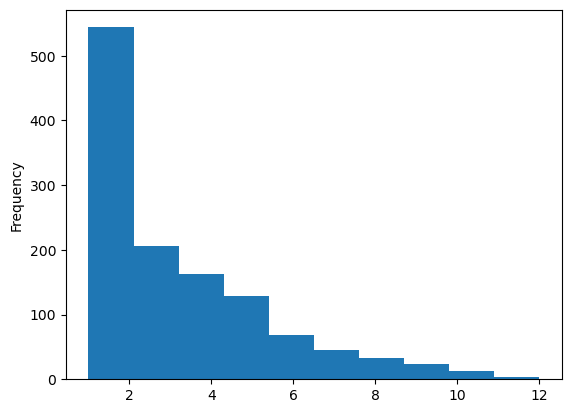

In [4]:
df_dev_set.reset_index().RID_HASH.value_counts().plot.hist()

<AxesSubplot:ylabel='Frequency'>

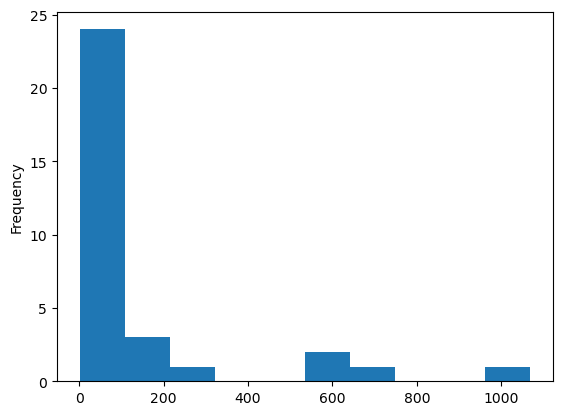

In [5]:
df_dev_set.reset_index().VISCODE.value_counts().plot.hist()

<AxesSubplot:ylabel='RID_HASH-VISCODE'>

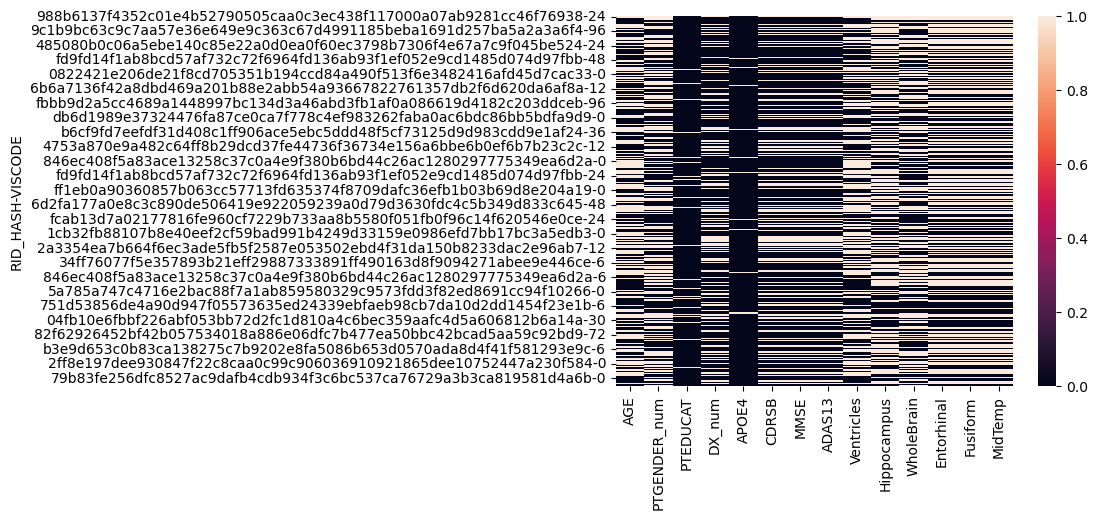

In [6]:
sns.heatmap(df_test_a.isna())

<AxesSubplot:ylabel='RID_HASH-VISCODE'>

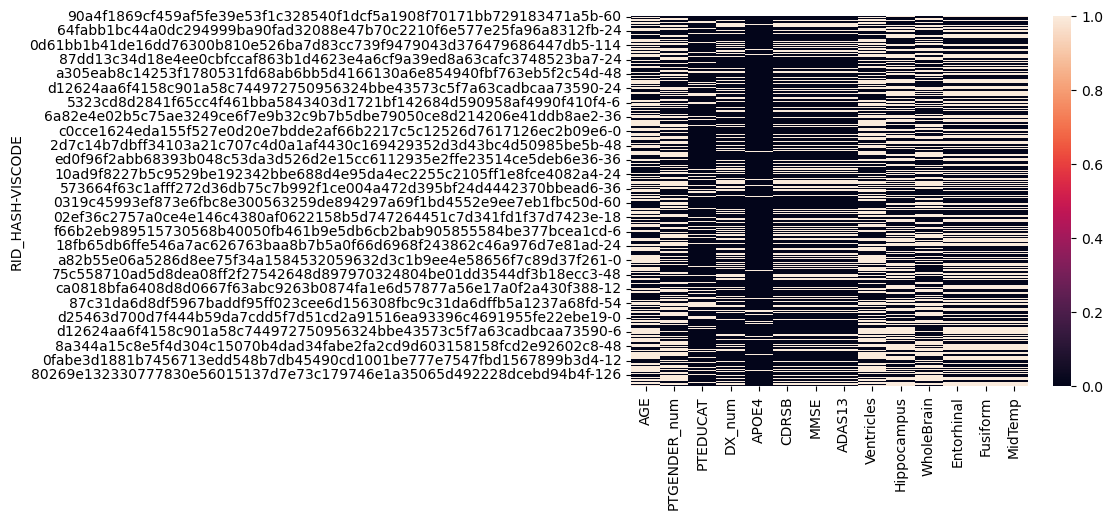

In [7]:
sns.heatmap(df_test_b.isna())

<AxesSubplot:ylabel='RID_HASH-VISCODE'>

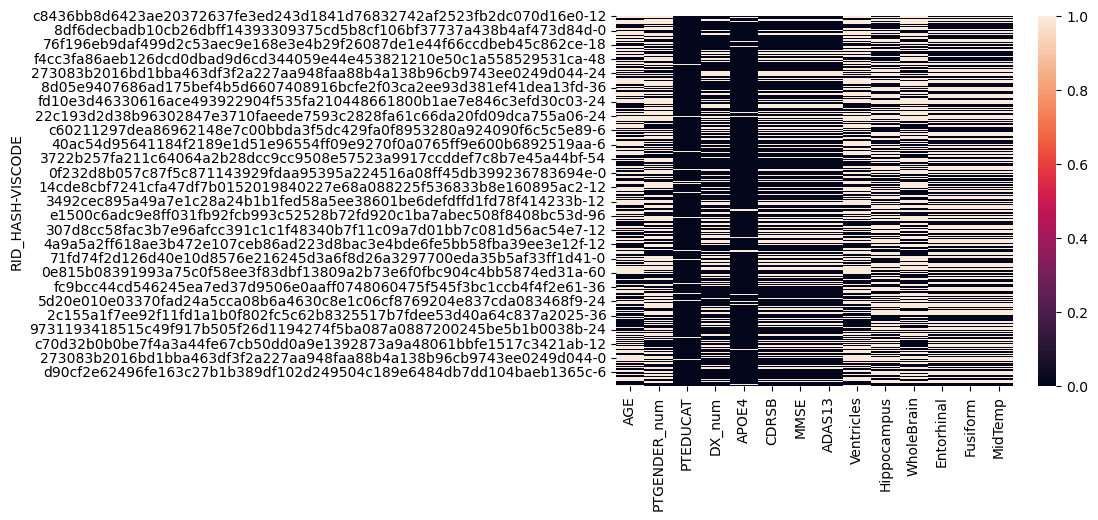

In [8]:
sns.heatmap(df_dev_1.isna())

<AxesSubplot:ylabel='RID_HASH-VISCODE'>

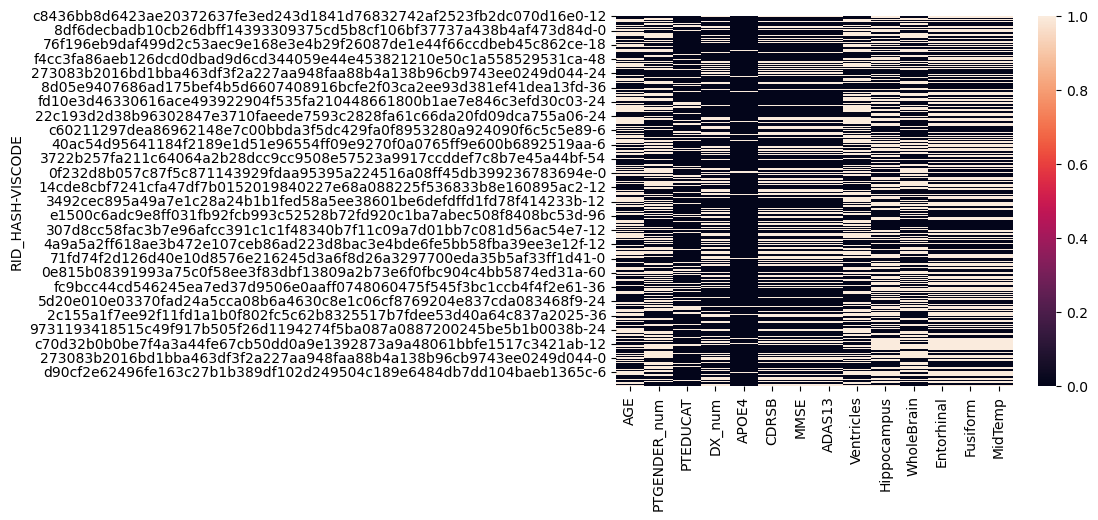

In [9]:
sns.heatmap(df_dev_2.isna())

<AxesSubplot:ylabel='RID_HASH-VISCODE'>

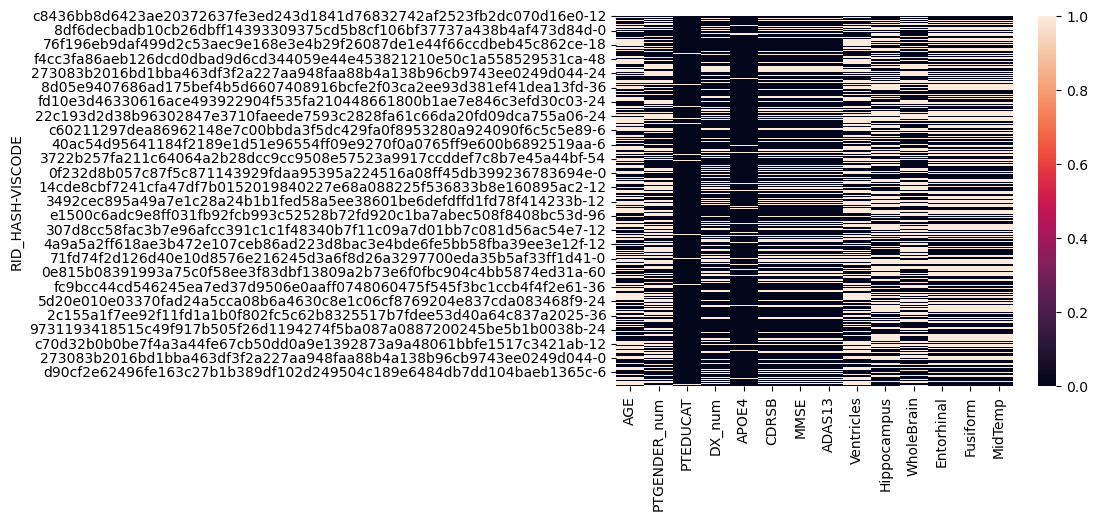

In [10]:
sns.heatmap(df_dev_3.isna())

In [11]:
df_dev_set

,,AGE,PTGENDER_num,PTEDUCAT,DX_num,APOE4,CDRSB,MMSE,ADAS13,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp
RID_HASH,VISCODE,,,,,,,,,,,,,,
c8436bb8d6423ae20372637fe3ed243d1841d76832742af2523fb2dc070d16e0,12,82.3,1,18,1.0,0.0,0.5,29.0,7.00,42666.0,5806.0,1067150.0,3237.0,17626.0,19256.0
efbf8e1fae0f9e1691d857c70b0e1c42f4a5dc92cbd3f2e07acaa93fc0de9d0a,36,66.6,1,16,0.0,0.0,0.0,28.0,7.00,26394.0,7004.0,950761.0,3461.0,17094.0,23828.0
5af3d63fa36791c95aa708d02a2bcaaa7446307edf0b768fbdce5a7a057a8b92,138,91.3,0,14,0.0,0.0,0.0,29.0,16.33,49889.6,6750.5,984359.0,4450.0,14741.0,18083.0
90511e19cfc88ad5488e4971578eeffd23449914ffc4ef4093ec5860073d3d29,12,62.5,0,12,1.0,0.0,1.5,29.0,13.00,19305.3,7632.4,1053560.0,4018.0,16343.0,22637.0
8bd78c9a63d7e92659baefc24939dd710f76a58fc42d3984b1df12440f09cbf7,12,76.4,1,18,1.0,0.0,0.5,27.0,17.00,40844.0,5730.0,1122510.0,1959.0,17774.0,19219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6eae53ebd4ea1f196d7f5c21a1a7a5b5c0c5663354293e8c3472ec1f39853371,48,74.1,0,12,0.0,0.0,0.0,29.0,13.00,61558.0,6834.0,1149800.0,2111.0,18478.0,22445.0
440c0040d1b4cad8820b567455569e152ae2e61602f4cccdcc25cdcd0c3375c3,120,94.2,0,16,0.0,1.0,0.0,30.0,8.00,48455.0,5480.0,950489.0,3189.0,19392.0,18094.0
257a9f64e9b2c64e13d339f7e936885113659f2719059d89c5abc80a06465499,24,65.9,0,13,2.0,1.0,5.5,23.0,29.00,71425.0,6223.0,1104740.0,2442.0,17071.0,17315.0


In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

In [52]:

df_dev_set_standardized = pd.DataFrame(scaler.fit_transform(df_dev_set), columns = df_dev_set.columns, index=df_dev_set.index)
df_dev_1_standardized = pd.DataFrame(scaler.transform(df_dev_1), columns = df_dev_1.columns, index=df_dev_1.index)
df_dev_2_standardized = pd.DataFrame(scaler.transform(df_dev_2), columns = df_dev_2.columns, index=df_dev_2.index)
df_dev_3_standardized = pd.DataFrame(scaler.transform(df_dev_3), columns = df_dev_3.columns, index=df_dev_3.index)
df_test_a_standardized = pd.DataFrame(scaler.transform(df_test_a), columns = df_test_a.columns, index=df_test_a.index)
df_test_b_standardized = pd.DataFrame(scaler.transform(df_test_b), columns = df_test_b.columns, index=df_test_b.index)


In [53]:
df_dev_1_standardized

,,AGE,PTGENDER_num,PTEDUCAT,DX_num,APOE4,CDRSB,MMSE,ADAS13,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp
RID_HASH,VISCODE,,,,,,,,,,,,,,
c8436bb8d6423ae20372637fe3ed243d1841d76832742af2523fb2dc070d16e0,12,NaN,NaN,0.8750,0.5,0.0,0.03125,0.961538,0.095890,NaN,0.390406,NaN,0.387302,0.441394,0.447331
efbf8e1fae0f9e1691d857c70b0e1c42f4a5dc92cbd3f2e07acaa93fc0de9d0a,36,0.283721,NaN,0.7500,0.0,0.0,0.00000,0.923077,0.095890,0.135708,0.525621,NaN,0.426808,0.414983,0.642708
5af3d63fa36791c95aa708d02a2bcaaa7446307edf0b768fbdce5a7a057a8b92,138,0.858140,0.0,0.6250,0.0,0.0,0.00000,0.961538,0.223699,0.289416,0.497009,0.383093,0.601235,0.298168,0.397205
90511e19cfc88ad5488e4971578eeffd23449914ffc4ef4093ec5860073d3d29,12,0.188372,NaN,NaN,0.5,NaN,0.09375,0.961538,0.178082,0.089333,NaN,NaN,NaN,NaN,NaN
8bd78c9a63d7e92659baefc24939dd710f76a58fc42d3984b1df12440f09cbf7,12,0.511628,1.0,0.8750,0.5,0.0,0.03125,0.884615,0.232877,0.230240,NaN,0.552975,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6eae53ebd4ea1f196d7f5c21a1a7a5b5c0c5663354293e8c3472ec1f39853371,48,0.458140,NaN,0.5000,0.0,0.0,0.00000,0.961538,0.178082,0.365751,NaN,NaN,NaN,NaN,NaN
440c0040d1b4cad8820b567455569e152ae2e61602f4cccdcc25cdcd0c3375c3,120,0.925581,0.0,0.7500,0.0,0.5,0.00000,1.000000,0.109589,0.280031,NaN,0.341444,NaN,NaN,NaN
257a9f64e9b2c64e13d339f7e936885113659f2719059d89c5abc80a06465499,24,0.267442,NaN,0.5625,1.0,0.5,0.34375,0.730769,0.397260,0.430301,0.437472,NaN,0.247090,0.413841,0.364386


In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
def get_mse(y_true: np.ndarray, y_pred: np.ndarray, *, multioutput: str="uniform_average"):
    assert y_true.shape == y_pred.shape
    return mean_squared_error(y_true, y_pred, multioutput=multioutput)


In [56]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

In [57]:
get_mse(df_dev_set_standardized.values, SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df_dev_1_standardized.values))

0.019316045509678376

In [98]:
mask = df_dev_1_standardized.isna().sum(axis=1) > 0 
get_mse(df_dev_set_standardized.values[mask], SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df_dev_1_standardized.values)[mask])

0.021328783692835657

In [58]:
get_mse(df_dev_set_standardized.values, SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df_dev_2_standardized.values))

0.019095409000466995

In [59]:
get_mse(df_dev_set_standardized.values, SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df_dev_3_standardized.values))

0.018179914538086178

In [60]:
get_mse(df_dev_set_standardized.values, KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean').fit_transform(df_dev_1_standardized.values))

0.02256020386313406

In [61]:
get_mse(df_dev_set_standardized.values, KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean').fit_transform(df_dev_1_standardized.values))

0.023181107779697945

In [62]:
for i in range(50, 100, 5):
    print(i, get_mse(df_dev_set_standardized.values, KNNImputer(n_neighbors=i, weights='distance', metric='nan_euclidean').fit_transform(df_dev_1_standardized.values)))

50 0.02043270453986582
55 0.020416202239643525
60 0.02041077640912053
65 0.020414114855469408
70 0.020405821021602533
75 0.020412062206708142
80 0.02040823852973466
85 0.020412922758724104
90 0.020411078836329276
95 0.020405150545957162


In [63]:
for i in [10, 100, 200, 500, 800, 1000, 1500, 2000, 5000]:
    print(i, get_mse(df_dev_set_standardized.values, KNNImputer(n_neighbors=i, weights='uniform', metric='nan_euclidean').fit_transform(df_dev_1_standardized.values)))

10 0.020684916827526025
100 0.01764029275142347
200 0.017294895652720122
500 0.017439646490200893
800 0.01776625969838093
1000 0.017984020400999
1500 0.01849225475474075
2000 0.019035674619610535
5000 0.019316045509678376


In [64]:
get_mse(df_dev_set_standardized.values, IterativeImputer(random_state=0, max_iter=100).fit_transform(df_dev_1_standardized.values))


0.016371932433578772

In [65]:
get_mse(df_dev_set_standardized.values, IterativeImputer(random_state=0, max_iter=100).fit_transform(df_dev_2_standardized.values))


0.01677947362957057

In [66]:
get_mse(df_dev_set_standardized.values, IterativeImputer(random_state=0, max_iter=100).fit_transform(df_dev_3_standardized.values))


0.01652001442618633